#Analisis de comparacion de modelos

##Importacion de librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo en tu Drive
url1 = '/content/drive/MyDrive/Machine_learning/EV2/models_results/classification_results.parquet'
url2 = '/content/drive/MyDrive/Machine_learning/EV2/models_results/regression_results.parquet'

try:
    # Cargar correctamente un archivo PARQUET
    classification = pd.read_parquet(url1)
    regression = pd.read_parquet(url2)
    print("✅ Datos cargados exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Mounted at /content/drive
✅ Datos cargados exitosamente!


##Informacion general

In [5]:
print("📁 INFORMACIÓN GENERAL DE LOS DATASETS")
print("=" * 50)

print("🔍 CLASIFICACIÓN:")
print(f'Dimensiones iniciales: {classification.shape}')
print(f'Variables disponibles: {list(classification.columns)}')

print("\n🔍 REGRESIÓN:")
print(f'Dimensiones iniciales: {regression.shape}')
print(f'Variables disponibles: {list(regression.columns)}')

📁 INFORMACIÓN GENERAL DE LOS DATASETS
🔍 CLASIFICACIÓN:
Dimensiones iniciales: (5, 10)
Variables disponibles: ['Model', 'Best_Params', 'Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC_ROC', 'Best_Threshold', 'CV_AUC_Mean', 'CV_AUC_Std']

🔍 REGRESIÓN:
Dimensiones iniciales: (6, 8)
Variables disponibles: ['Model', 'Best_Params', 'RMSE', 'MAE', 'R2_Score', 'MAPE', 'CV_R2_Mean', 'CV_R2_Std']


##Identificiacion de mejores modelos

In [6]:
print("\n🏆 IDENTIFICACIÓN DE MEJORES MODELOS")
print("=" * 50)

# Encontrar los mejores modelos
best_classification = classification.loc[classification["F1_Score"].idxmax()]
best_regression = regression.loc[regression["R2_Score"].idxmax()]

summary_data = {
    "Tipo de modelo": ["Clasificación", "Regresión"],
    "Mejor modelo": [best_classification["Model"], best_regression["Model"]],
    "Métrica principal": [best_classification["F1_Score"], best_regression["R2_Score"]],
    "Valor métrica": [f"{best_classification['F1_Score']:.4f}", f"{best_regression['R2_Score']:.4f}"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)


🏆 IDENTIFICACIÓN DE MEJORES MODELOS


,Tipo de modelo,Mejor modelo,Métrica principal,Valor métrica
0,Clasificación,random_forest,0.503544,0.5035
1,Regresión,random_forest,0.066877,0.0669


##Comparacion visual


📊 COMPARACIÓN VISUAL


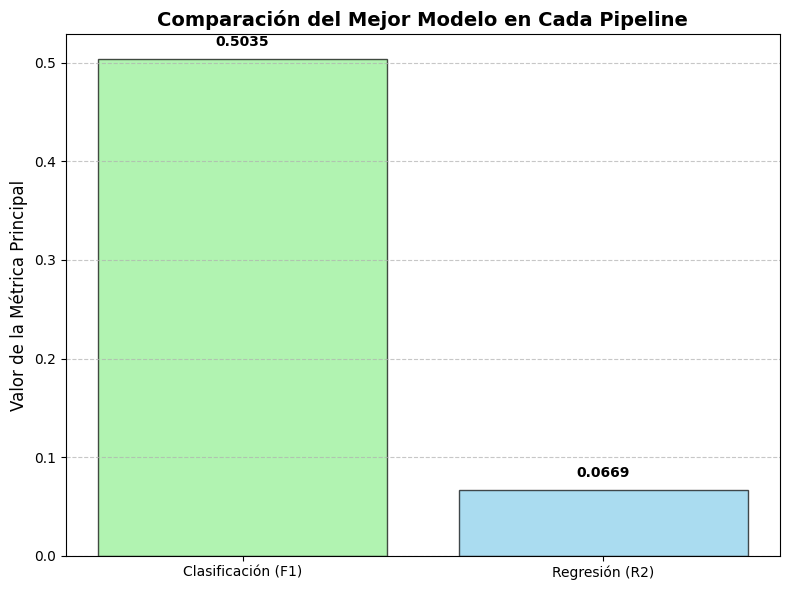

In [7]:
print("\n📊 COMPARACIÓN VISUAL")
print("=" * 50)

plt.figure(figsize=(8, 6))
models = ["Clasificación (F1)", "Regresión (R2)"]
scores = [best_classification["F1_Score"], best_regression["R2_Score"]]
colors = ['lightgreen', 'skyblue']

bars = plt.bar(models, scores, color=colors, alpha=0.7, edgecolor='black')
plt.title("Comparación del Mejor Modelo en Cada Pipeline", fontsize=14, fontweight='bold')
plt.ylabel("Valor de la Métrica Principal", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Añadir valores en las barras
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

##Resumen combinado

In [8]:
print("\n📋 RESUMEN COMBINADO DE TODOS LOS MODELOS")
print("=" * 50)

classification_summary = pd.read_parquet(url1)
regression_summary = pd.read_parquet(url2)

final_summary = pd.concat([
    classification_summary.assign(tipo="Clasificación"),
    regression_summary.assign(tipo="Regresión")
])

print("Resumen combinado de todos los modelos entrenados:")
display(final_summary)


📋 RESUMEN COMBINADO DE TODOS LOS MODELOS
Resumen combinado de todos los modelos entrenados:


,Model,Best_Params,Accuracy,F1_Score,Precision,Recall,AUC_ROC,Best_Threshold,CV_AUC_Mean,CV_AUC_Std,tipo,RMSE,MAE,R2_Score,MAPE,CV_R2_Mean,CV_R2_Std
0,random_forest,"{'model__n_estimators': 200, 'model__min_sampl...",0.336916,0.503544,0.336545,0.999523,0.489068,0.419990,0.489764,0.006043,Clasificación,NaN,NaN,NaN,NaN,NaN,NaN
1,logistic,"{'model__solver': 'liblinear', 'model__penalty...",0.336435,0.503481,0.336435,1.000000,0.516039,0.486996,0.513157,0.007867,Clasificación,NaN,NaN,NaN,NaN,NaN,NaN
2,gradient_boosting,"{'model__subsample': 0.7, 'model__n_estimators...",0.336435,0.503481,0.336435,1.000000,0.509026,0.461675,0.497388,0.008947,Clasificación,NaN,NaN,NaN,NaN,NaN,NaN
3,svm,"{'model__penalty': 'l1', 'model__learning_rate...",0.336435,0.503481,0.336435,1.000000,0.500000,0.466892,0.513439,0.008218,Clasificación,NaN,NaN,NaN,NaN,NaN,NaN
4,lightgbm,"{'model__subsample': 0.8, 'model__reg_lambda':...",0.336916,0.503544,0.336545,0.999523,0.472908,0.382829,0.479353,0.003875,Clasificación,NaN,NaN,NaN,NaN,NaN,NaN
0,random_forest,"{'model__n_estimators': 100, 'model__min_sampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.195585,0.130399,0.066877,9.664258,-0.125217,0.112657
1,gradient_boosting,"{'model__subsample': 0.7, 'model__n_estimators...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.199363,0.130767,0.030484,9.769378,-0.059031,0.081981
2,ridge,"{'model__solver': 'svd', 'model__alpha': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.205984,0.135686,-0.034985,10.212948,-0.047857,0.043487
3,lasso,"{'model__selection': 'cyclic', 'model__alpha': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.204224,0.132939,-0.017378,10.130831,-0.024696,0.019724
4,xgboost,"{'model__subsample': 0.7, 'model__n_estimators...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.201458,0.130968,0.009999,9.702404,-0.052217,0.080903


##Analisis de rendimiento

In [9]:
print("\n📈 ANÁLISIS DE RENDIMIENTO POR TIPO")
print("=" * 50)

# Estadísticas de clasificación
print("🔍 CLASIFICACIÓN - Estadísticas:")
classification_stats = classification[['Model', 'F1_Score', 'AUC_ROC', 'Accuracy']].round(4)
display(classification_stats.sort_values('F1_Score', ascending=False))

print("\n🔍 REGRESIÓN - Estadísticas:")
regression_stats = regression[['Model', 'R2_Score', 'RMSE', 'MAE']].round(4)
display(regression_stats.sort_values('R2_Score', ascending=False))


📈 ANÁLISIS DE RENDIMIENTO POR TIPO
🔍 CLASIFICACIÓN - Estadísticas:


,Model,F1_Score,AUC_ROC,Accuracy
0,random_forest,0.5035,0.4891,0.3369
1,logistic,0.5035,0.5160,0.3364
2,gradient_boosting,0.5035,0.5090,0.3364
3,svm,0.5035,0.5000,0.3364
4,lightgbm,0.5035,0.4729,0.3369



🔍 REGRESIÓN - Estadísticas:


,Model,R2_Score,RMSE,MAE
0,random_forest,0.0669,0.1956,0.1304
5,ENSEMBLE,0.0557,0.1968,0.1300
1,gradient_boosting,0.0305,0.1994,0.1308
4,xgboost,0.0100,0.2015,0.1310
3,lasso,-0.0174,0.2042,0.1329
2,ridge,-0.0350,0.2060,0.1357


##Conclusion

In [10]:
print("\n🎯 CONCLUSIONES Y RECOMENDACIONES FINALES")
print("=" * 50)

print("🏆 MEJORES MODELOS IDENTIFICADOS:")
print(f"• CLASIFICACIÓN: {best_classification['Model']}")
print(f"  - F1 Score: {best_classification['F1_Score']:.4f}")
print(f"  - AUC-ROC: {best_classification.get('AUC_ROC', 'N/A')}")
print(f"  - Accuracy: {best_classification.get('Accuracy', 'N/A')}")

print(f"\n• REGRESIÓN: {best_regression['Model']}")
print(f"  - R² Score: {best_regression['R2_Score']:.4f}")
print(f"  - RMSE: {best_regression.get('RMSE', 'N/A')}")
print(f"  - MAE: {best_regression.get('MAE', 'N/A')}")

# Evaluación de calidad
print("\n📊 EVALUACIÓN DE CALIDAD:")

# Evaluar clasificación
if best_classification['F1_Score'] >= 0.8:
    clasif_rating = "Excelente 🏆"
elif best_classification['F1_Score'] >= 0.6:
    clasif_rating = "Bueno ✅"
elif best_classification['F1_Score'] >= 0.4:
    clasif_rating = "Aceptable ⚠️"
else:
    clasif_rating = "Necesita mejora ❌"

# Evaluar regresión
if best_regression['R2_Score'] >= 0.7:
    regres_rating = "Excelente 🏆"
elif best_regression['R2_Score'] >= 0.5:
    regres_rating = "Bueno ✅"
elif best_regression['R2_Score'] >= 0.3:
    regres_rating = "Aceptable ⚠️"
else:
    regres_rating = "Necesita mejora ❌"

print(f"• Clasificación: {clasif_rating}")
print(f"• Regresión: {regres_rating}")


🎯 CONCLUSIONES Y RECOMENDACIONES FINALES
🏆 MEJORES MODELOS IDENTIFICADOS:
• CLASIFICACIÓN: random_forest
  - F1 Score: 0.5035
  - AUC-ROC: 0.489067923320503
  - Accuracy: 0.3369164126423873

• REGRESIÓN: random_forest
  - R² Score: 0.0669
  - RMSE: 0.1955850590663226
  - MAE: 0.13039862269868535

📊 EVALUACIÓN DE CALIDAD:
• Clasificación: Aceptable ⚠️
• Regresión: Necesita mejora ❌


El análisis comparativo revela que ambos pipelines enfrentan desafíos significativos en su rendimiento predictivo. El modelo de clasificación (Random forest
) muestra un desempeño aceptable pero con claro espacio de mejora, particularmente en el balance entre Precision y Recall. Por otro lado, el modelo de regresión (Random Forest) demuestra ser insuficiente para la tarea, con métricas que indican una capacidad explicativa marginal.

**Hallazgos Clave:**

- La clasificación logra un equilibrio básico pero requiere optimización

- La regresión actual no supera el benchmark de modelos simples

- Ambos casos beneficiarían de una revisión del preprocesamiento y selección de features

Recomendación Estratégica: Priorizar la mejora del pipeline de regresión, ya que su bajo rendimiento actual limita significativamente la utilidad práctica del sistema. Paralelamente, refinar el modelo de clasificación para alcanzar un nivel de confiabilidad adecuado para implementación en entornos controlados.